## Iyzico İşlem Hacmi Tahmini 

### Kütüphaneler ve Verinin Yüklenmesi

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('iyzico_data.csv', parse_dates = ['transaction_date'])

### Data Understanding & Preparation (Veriyi Anlamak ve Hazırlamak)

In [6]:
df.head()

,Unnamed: 0,transaction_date,merchant_id,Total_Transaction,Total_Paid
0,0,2018-01-01,535,349,25883.226
1,1,2018-01-01,42616,141,40918.860
2,2,2018-01-01,46774,410,306902.700
3,3,2018-01-01,86302,10,11.340
4,4,2018-01-01,124381,285,111383.766


In [7]:
df.drop(columns=['Unnamed: 0'], inplace = True)

In [8]:
df.head()

,transaction_date,merchant_id,Total_Transaction,Total_Paid
0,2018-01-01,535,349,25883.226
1,2018-01-01,42616,141,40918.860
2,2018-01-01,46774,410,306902.700
3,2018-01-01,86302,10,11.340
4,2018-01-01,124381,285,111383.766


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667 entries, 0 to 7666
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_date   7667 non-null   datetime64[ns]
 1   merchant_id        7667 non-null   int64         
 2   Total_Transaction  7667 non-null   int64         
 3   Total_Paid         7667 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 239.7 KB


In [10]:
df['transaction_date'].min(), df['transaction_date'].max()

(Timestamp('2018-01-01 00:00:00'), Timestamp('2020-12-31 00:00:00'))

In [11]:
# 7 tane iş yeri bulunmaktadır.
df['merchant_id'].nunique()

7

In [12]:
df['merchant_id'].unique()

array([   535,  42616,  46774,  86302, 124381, 129316,  57192],
      dtype=int64)

In [13]:
# Her iş yerindeki toplam işlem sayısı
df.groupby(['merchant_id'])['Total_Transaction'].sum()

merchant_id
535       1302725
42616     1126191
46774     1599559
57192     1146440
86302      840951
124381    1935357
129316     440029
Name: Total_Transaction, dtype: int64

In [14]:
# Her iş yerindeki toplam ödeme miktarı
df.groupby(['merchant_id'])['Total_Paid'].sum()

merchant_id
535       1.566015e+08
42616     3.545831e+08
46774     1.567200e+09
57192     3.173371e+08
86302     2.870447e+06
124381    1.158693e+09
129316    1.555471e+06
Name: Total_Paid, dtype: float64

In [15]:
# Ay bilgisini yeni bir değişken olarak ekleyelim
df['month'] = df['transaction_date'].dt.month

In [16]:
# Yıl bilgisini yeni bir değişken olarak ekleyelim
df['year'] = df['transaction_date'].dt.year

In [17]:
df.head()

,transaction_date,merchant_id,Total_Transaction,Total_Paid,month,year
0,2018-01-01,535,349,25883.226,1,2018
1,2018-01-01,42616,141,40918.860,1,2018
2,2018-01-01,46774,410,306902.700,1,2018
3,2018-01-01,86302,10,11.340,1,2018
4,2018-01-01,124381,285,111383.766,1,2018


In [18]:
# Bu işlem, tüm yıllardaki aylara göre toplam satışları gösterir.
df.groupby(['merchant_id','month']).agg({'Total_Transaction' : 'sum'})

Total_Transaction
merchant_id month                   
535         1                  90575
            2                  90179
            3                  89794
            4                  75730
            5                  94574
...                              ...
129316      8                  48165
            9                  47878
            10                 39418
            11                 40031
            12                 43847

[84 rows x 1 columns]

In [19]:
# Şirketlerin yıl ve aya göre işlem sayılarının incelenmesi.
df.groupby(['merchant_id','year','month']).agg({'Total_Transaction' : ['sum', 'mean', 'median']})

Total_Transaction                   
                                     sum        mean median
merchant_id year month                                     
535         2018 1                 20927  675.064516  695.0
                 2                 20247  723.107143  750.5
                 3                 22807  735.709677  725.0
                 4                 22459  748.633333  760.5
                 5                 24443  788.483871  804.0
...                                  ...         ...    ...
129316      2020 8                 16586  535.032258  549.0
                 9                 17784  592.800000  597.0
                 10                18134  584.967742  586.0
                 11                18280  609.333333  603.0
                 12                20103  648.483871  642.0

[252 rows x 3 columns]

In [20]:
# Şirketlerin yıl ve aya göre toplam ödeme miktarlarının incelenmesi.
df.groupby(['merchant_id','year','month']).agg({'Total_Paid' : ['sum', 'mean', 'median']})

Total_Paid                         
                                sum          mean     median
merchant_id year month                                      
535         2018 1      2091231.810  67459.090645  71088.660
                 2      2060521.056  73590.037714  73345.545
                 3      2371568.274  76502.202387  71045.640
                 4      2504558.754  83485.291800  83215.548
                 5      2831761.170  91347.134516  90838.422
...                             ...           ...        ...
129316      2020 8        72080.100   2325.164516   2341.350
                 9        79788.600   2659.620000   2627.550
                 10       79789.050   2573.840323   2579.400
                 11       80757.450   2691.915000   2704.500
                 12       87448.500   2820.919355   2815.200

[252 rows x 3 columns]

In [21]:
# Bu işlem, tüm yıllara göre toplam satışları gösterir.
yearly_sales = df.groupby(['merchant_id','year']).agg({'Total_Transaction' : 'sum'})
yearly_sales

Total_Transaction
merchant_id year                   
535         2018             273402
            2019             434672
            2020             594651
42616       2018             189402
            2019             318784
            2020             618005
46774       2018             410259
            2019             535471
            2020             653829
57192       2018             324180
            2019             379923
            2020             442337
86302       2018              38923
            2019              51842
            2020             750186
124381      2018             170631
            2019             320002
            2020            1444724
129316      2018             112171
            2019             144886
            2020             182972

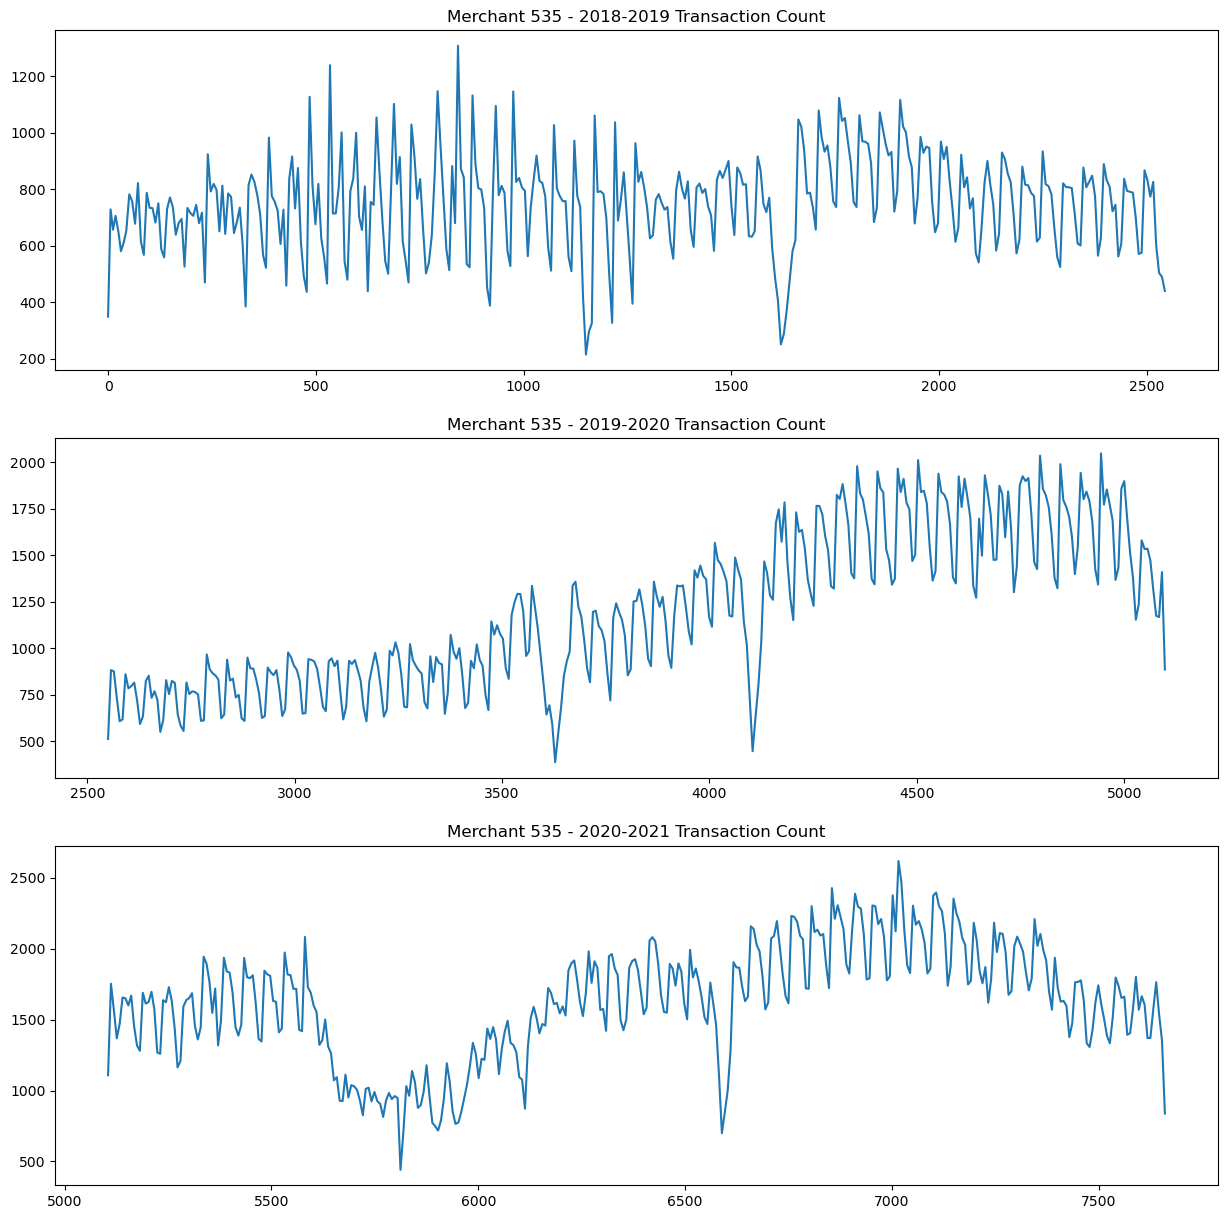

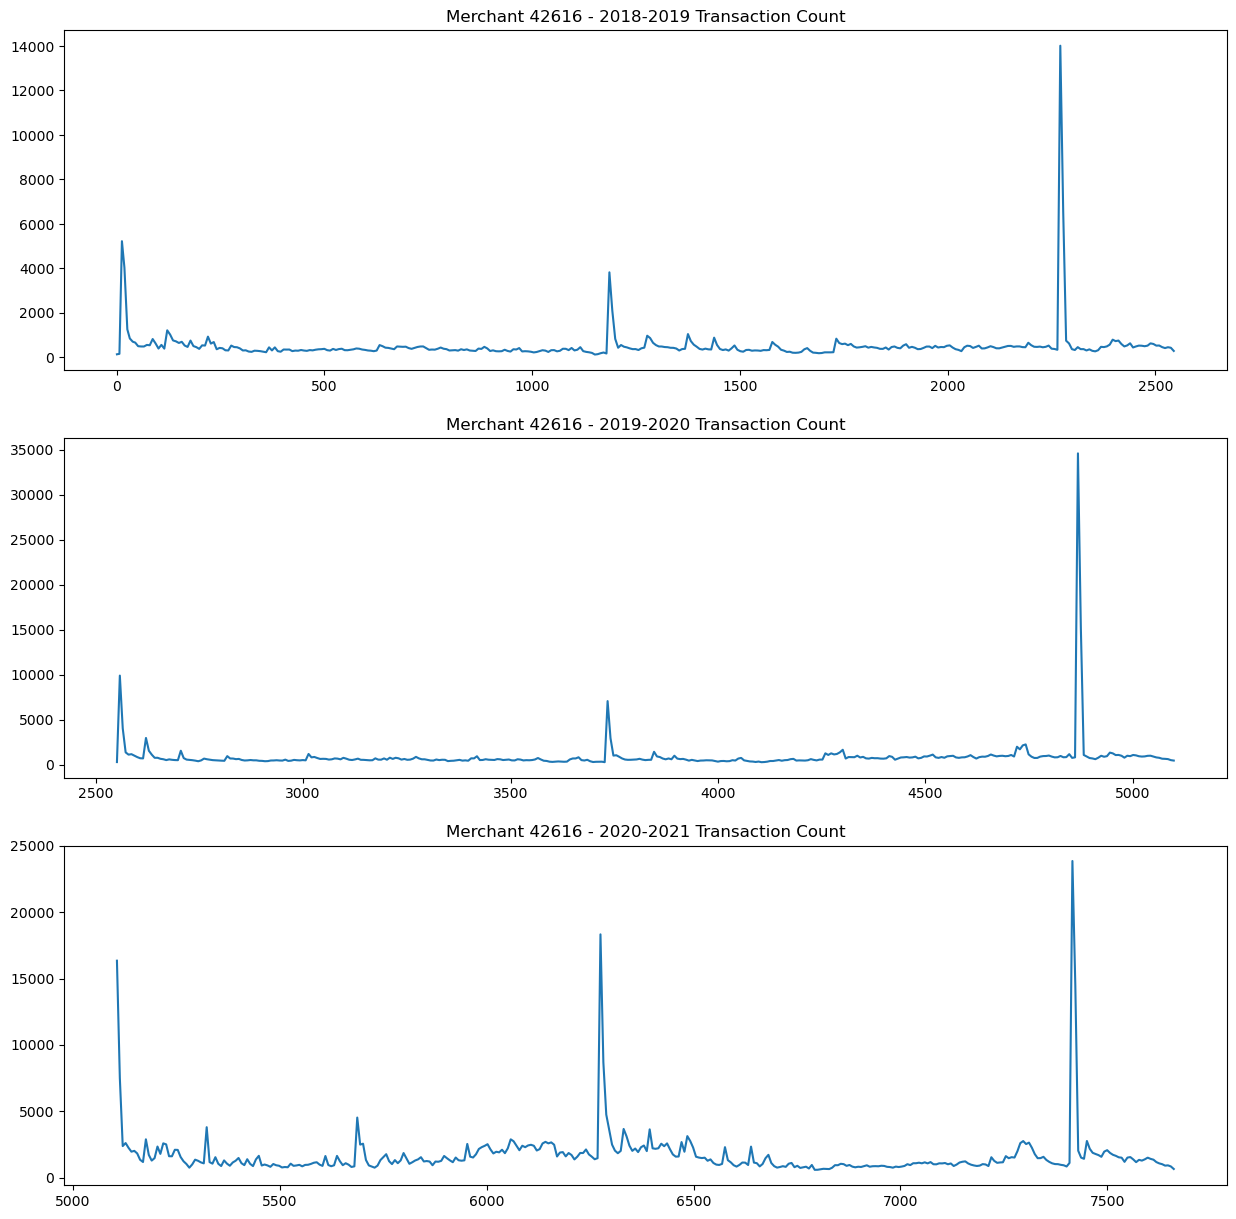

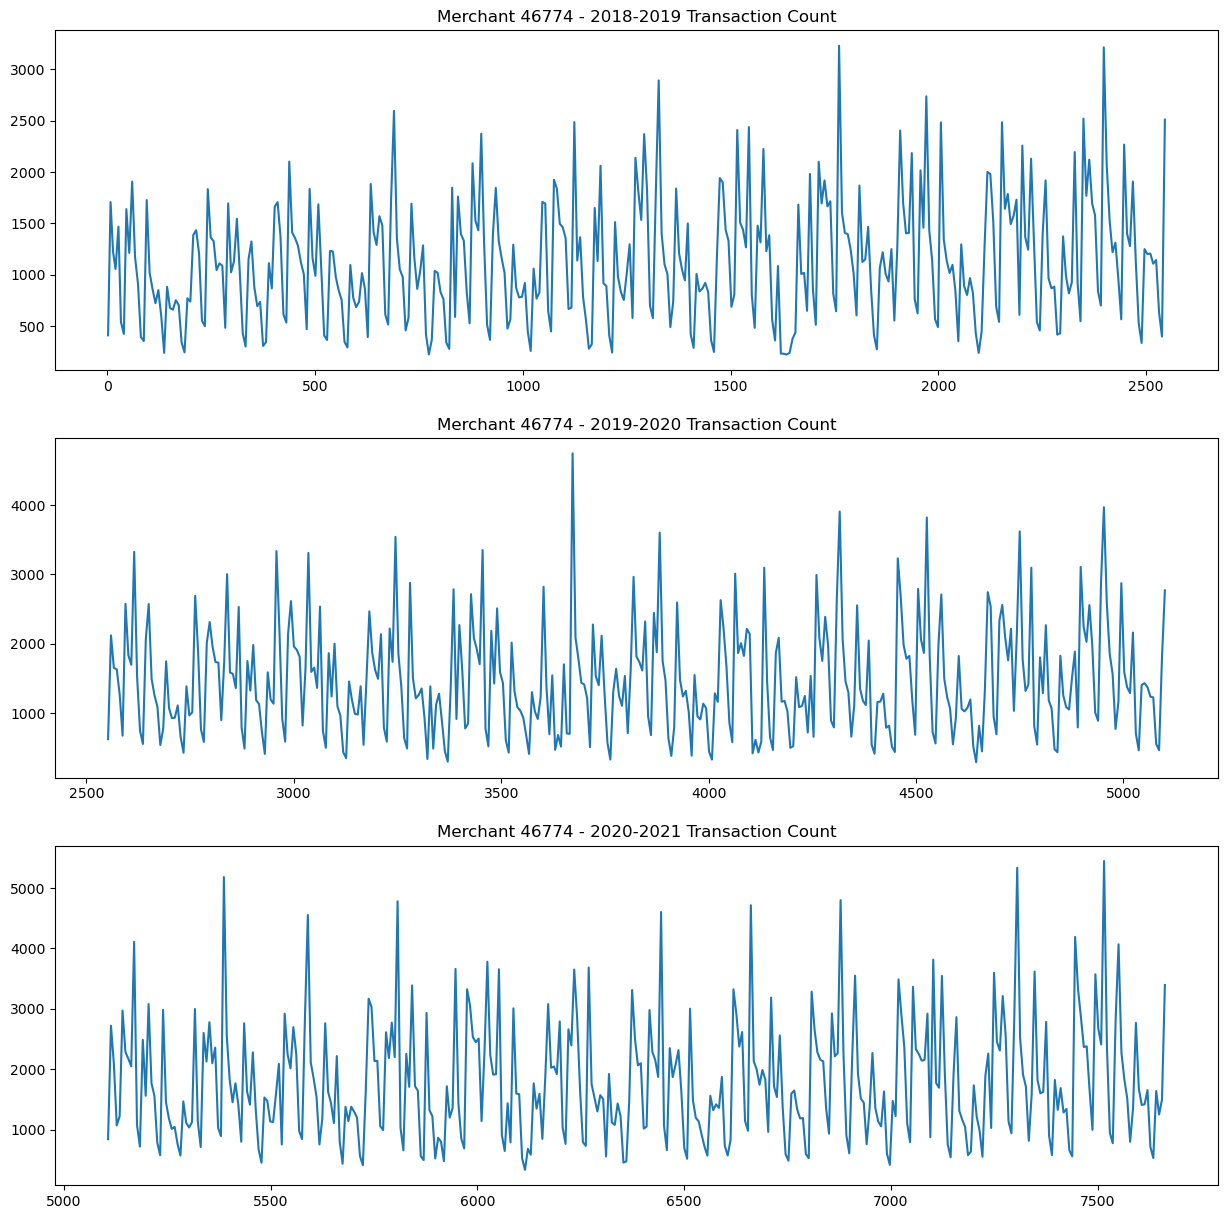

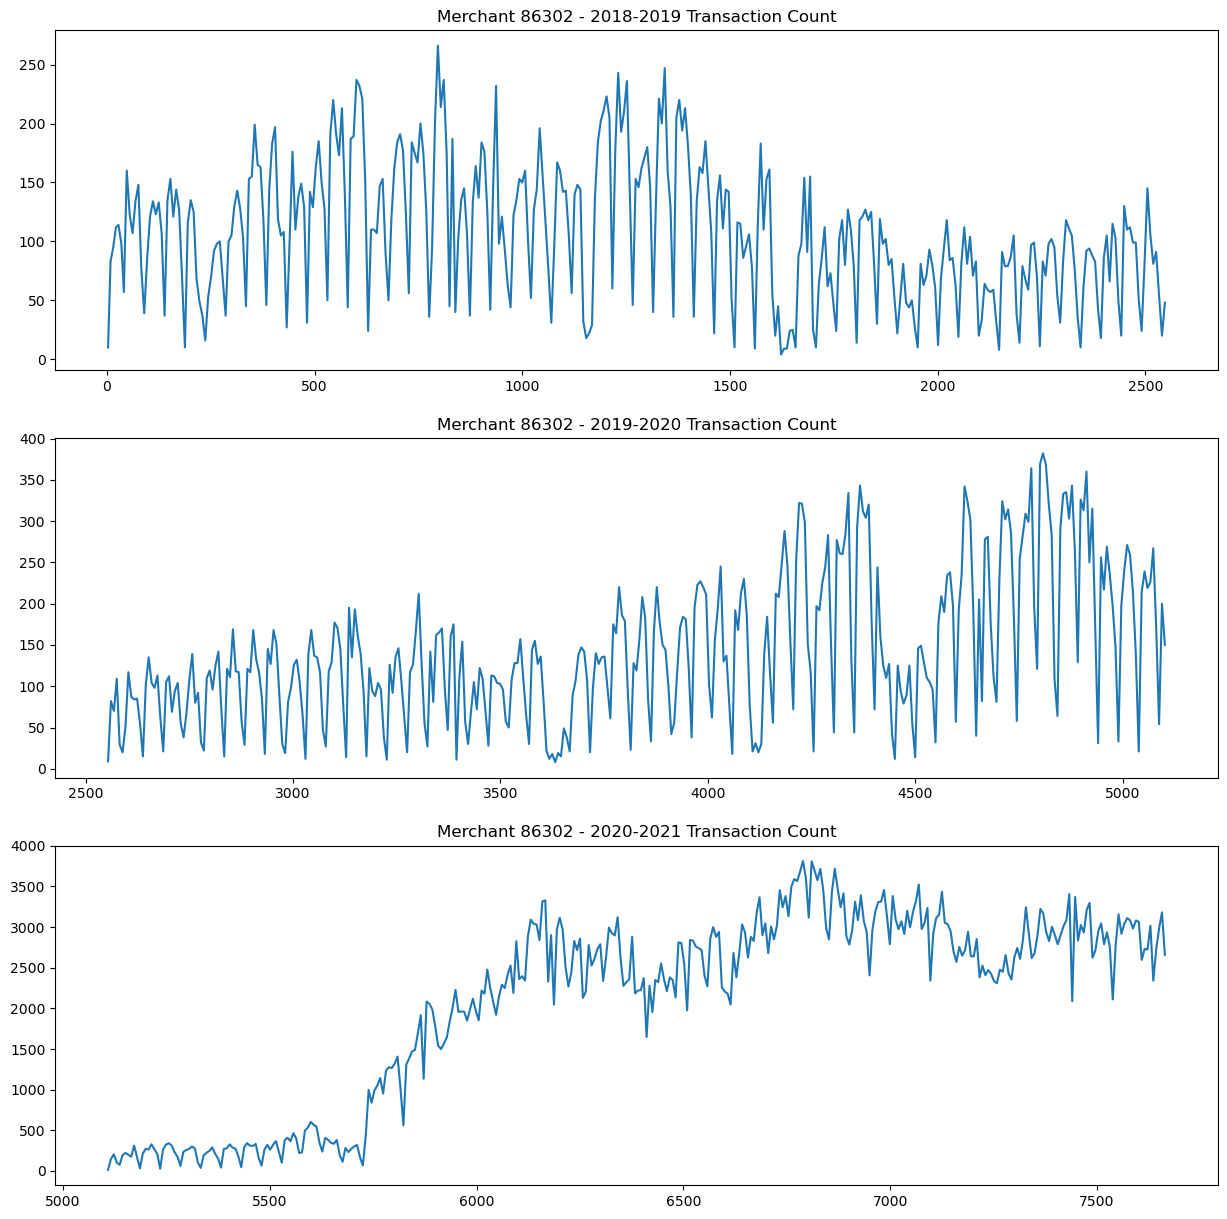

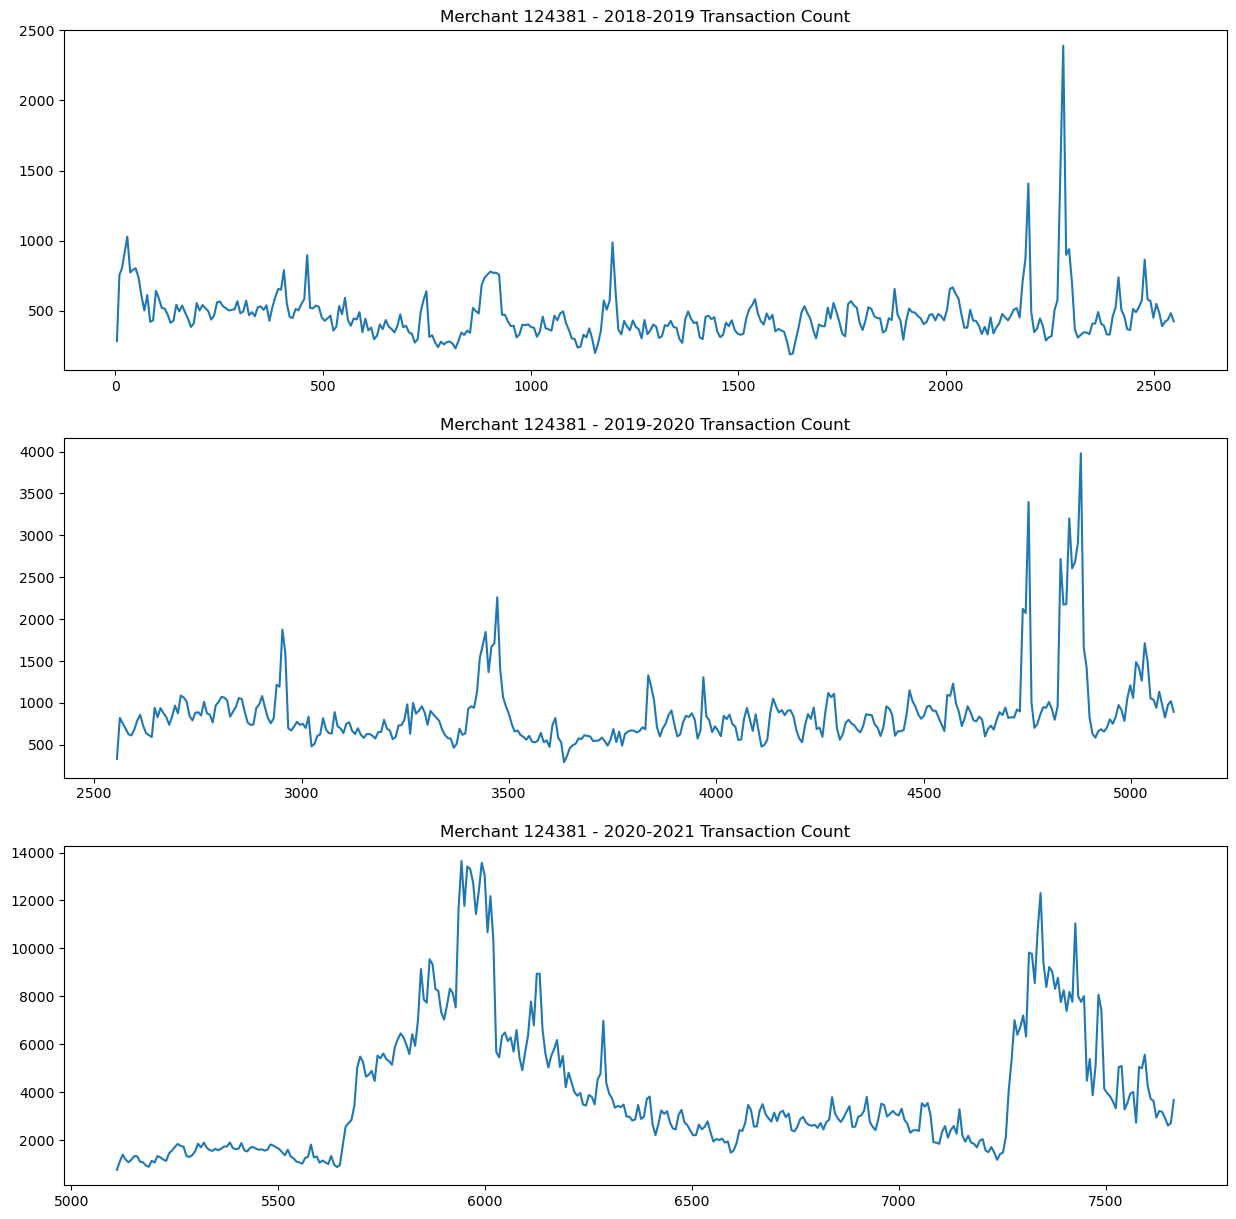

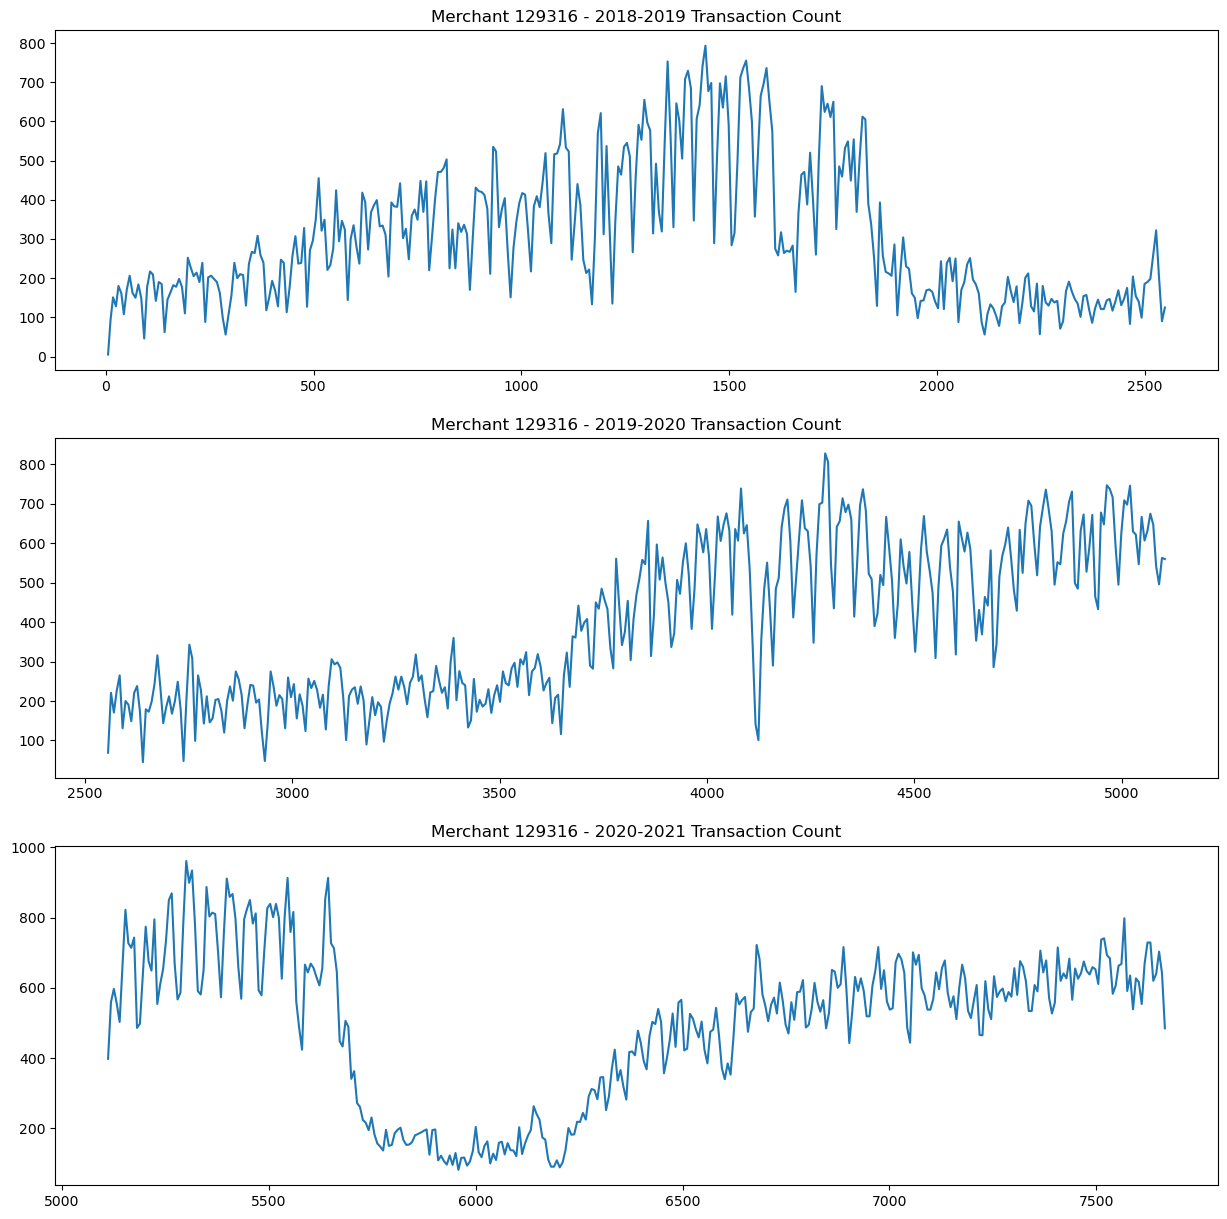

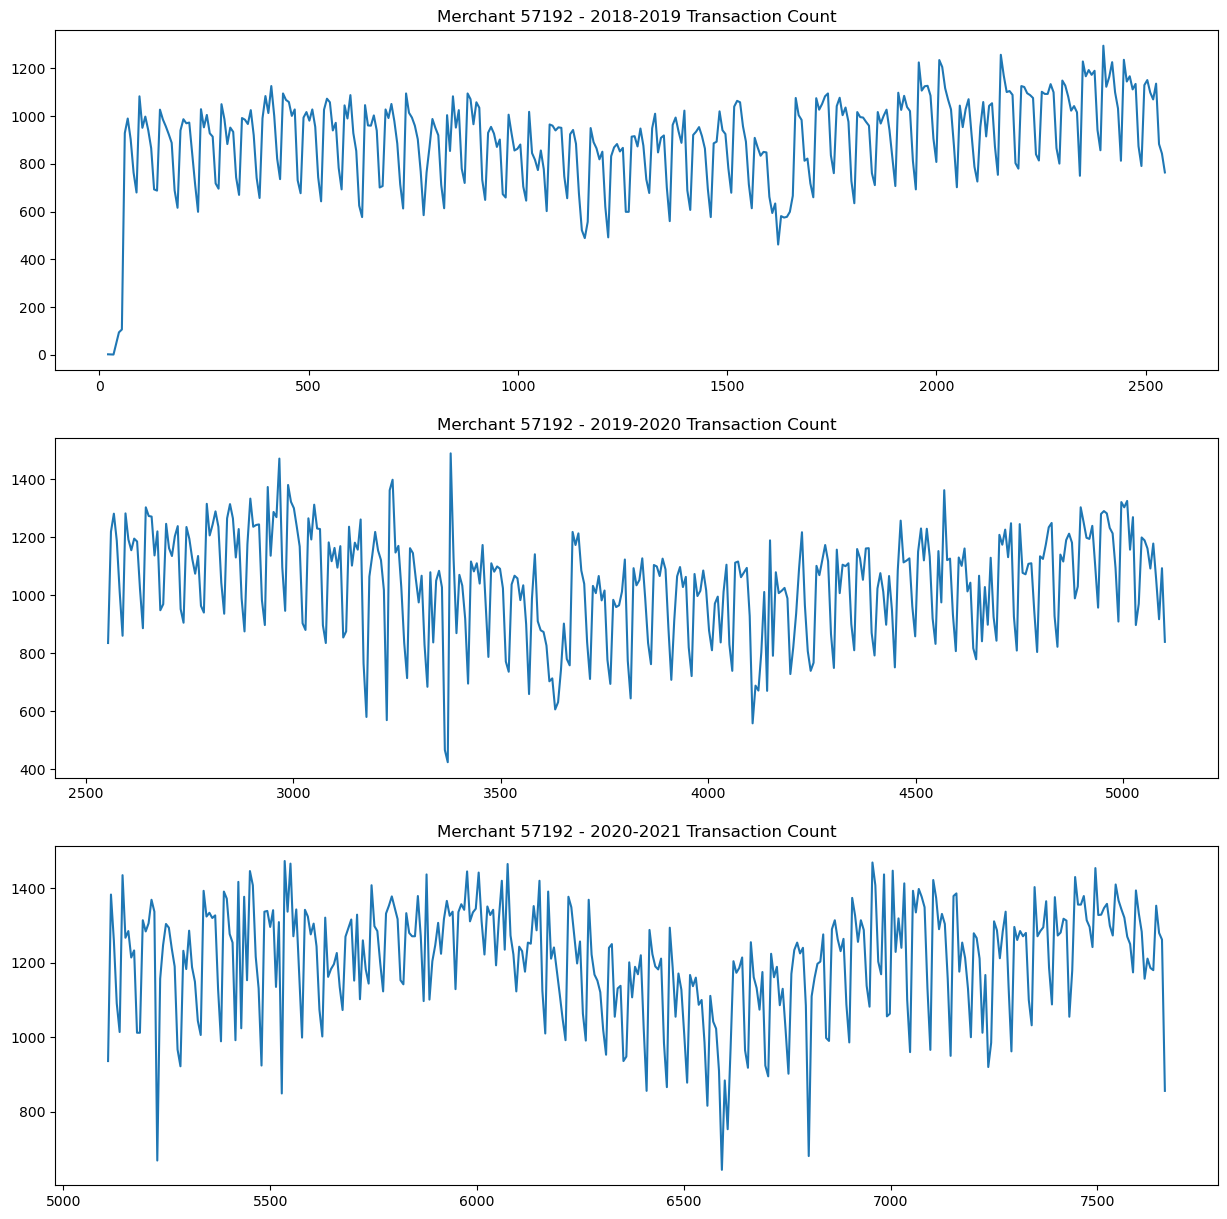

In [22]:
# Her şirket için grafikleri oluşturalım
for id in df.merchant_id.unique():
    plt.figure(figsize=(15, 15))

    # 2018-2019 dönemi
    plt.subplot(3, 1, 1, title=f'Merchant {id} - 2018-2019 Transaction Count')
    df[(df.merchant_id == id) & (df.transaction_date >= "2018-01-01") & (df.transaction_date < "2019-01-01")]["Total_Transaction"].plot()
    plt.xlabel('')

    # 2019-2020 dönemi
    plt.subplot(3, 1, 2, title=f'Merchant {id} - 2019-2020 Transaction Count')
    df[(df.merchant_id == id) & (df.transaction_date >= "2019-01-01") & (df.transaction_date < "2020-01-01")]["Total_Transaction"].plot()
    plt.xlabel('')

    # 2020-2021 dönemi
    plt.subplot(3, 1, 3, title=f'Merchant {id} - 2020-2021 Transaction Count')
    df[(df.merchant_id == id) & (df.transaction_date >= "2020-01-01") & (df.transaction_date < "2021-01-01")]["Total_Transaction"].plot()
    plt.xlabel('')
    plt.show()

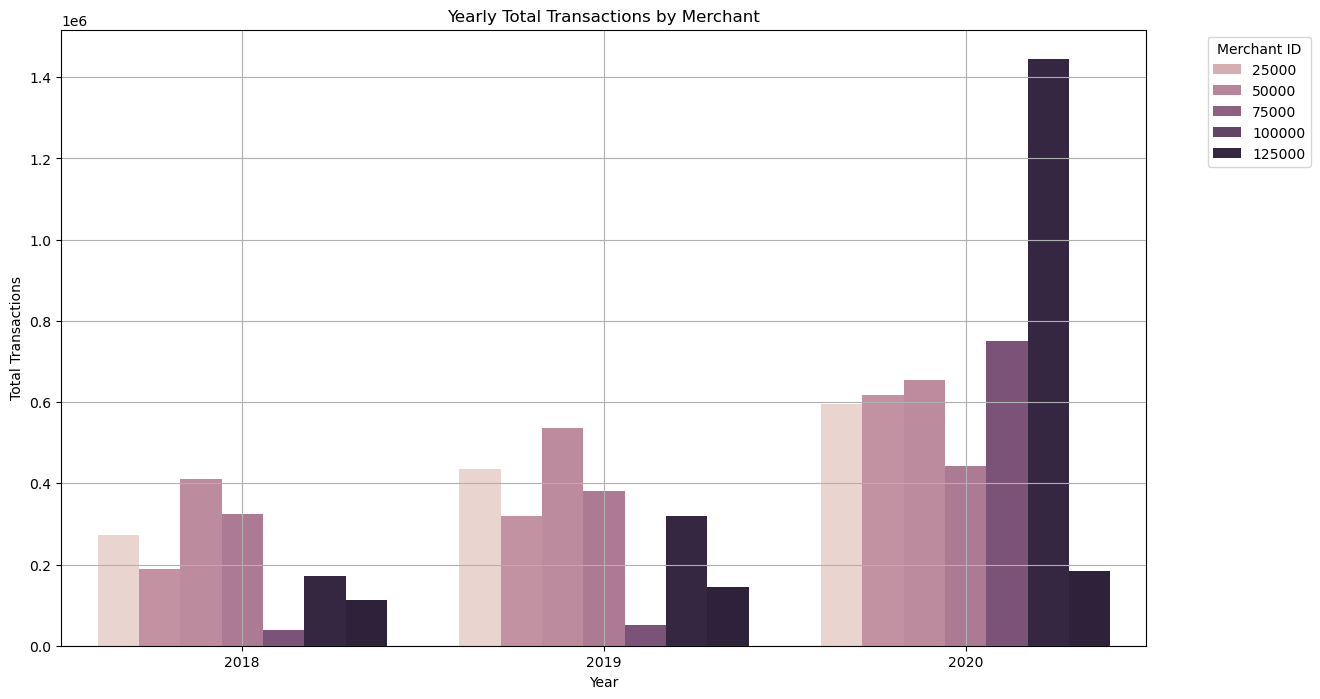

In [23]:
plt.figure(figsize=(14, 8))
sns.barplot(data=yearly_sales, x='year', y='Total_Transaction', hue='merchant_id')
plt.title('Yearly Total Transactions by Merchant')
plt.xlabel('Year')
plt.ylabel('Total Transactions')
plt.legend(title='Merchant ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### Date Features

In [25]:
# Date Features üretmek için bir fonksiyon tanımlayalım
def create_date_features(df) :
    df['month'] = df['transaction_date'].dt.month
    df['day_of_month'] = df['transaction_date'].dt.day
    df['day_of_year'] = df['transaction_date'].dt.dayofyear
    df['week_of_year'] = df['transaction_date'].dt.isocalendar().week
    df['day_of_week'] = df['transaction_date'].dt.dayofweek # Pazartesi 0 olarak gösterilir
    df['year'] = df['transaction_date'].dt.year
    df["is_wknd"] = df['transaction_date'].dt.weekday // 4
    df['is_month_start'] = df['transaction_date'].dt.is_month_start.astype(int)
    df['is_month_end'] = df['transaction_date'].dt.is_month_end.astype(int)
    df['quarter'] = df['transaction_date'].dt.quarter
    df['is_quarter_start'] = df['transaction_date'].dt.is_quarter_start.astype(int)
    df['is_quarter_end'] = df['transaction_date'].dt.is_quarter_end.astype(int)
    df['is_year_start'] = df['transaction_date'].dt.is_year_start.astype(int)
    df['is_year_end'] = df['transaction_date'].dt.is_year_end.astype(int)
    return df

In [26]:
df = create_date_features(df)

In [27]:
df.head()

,transaction_date,merchant_id,Total_Transaction,Total_Paid,month,year,day_of_month,day_of_year,week_of_year,day_of_week,is_wknd,is_month_start,is_month_end,quarter,is_quarter_start,is_quarter_end,is_year_start,is_year_end
0,2018-01-01,535,349,25883.226,1,2018,1,1,1,0,0,1,0,1,1,0,1,0
1,2018-01-01,42616,141,40918.860,1,2018,1,1,1,0,0,1,0,1,1,0,1,0
2,2018-01-01,46774,410,306902.700,1,2018,1,1,1,0,0,1,0,1,1,0,1,0
3,2018-01-01,86302,10,11.340,1,2018,1,1,1,0,0,1,0,1,1,0,1,0
4,2018-01-01,124381,285,111383.766,1,2018,1,1,1,0,0,1,0,1,1,0,1,0


### Random Noise

In [29]:
def random_noise(dataframe):
    return np.random.normal(scale = 1.6, size = len(dataframe))

Bazı problemler ve aşırı öğrenmenin önüne geçmek amacıyla veri seti için bir gürültü fonksiyonu ekliyoruz.

### Lag Features

Verinin, merchant_id ve tarihe göre sıralanmış olması gerekir. Bunlara göre gecikmeyi hesaplayacağız.

In [33]:
df.head()

,transaction_date,merchant_id,Total_Transaction,Total_Paid,month,year,day_of_month,day_of_year,week_of_year,day_of_week,is_wknd,is_month_start,is_month_end,quarter,is_quarter_start,is_quarter_end,is_year_start,is_year_end
0,2018-01-01,535,349,25883.226,1,2018,1,1,1,0,0,1,0,1,1,0,1,0
1,2018-01-01,42616,141,40918.860,1,2018,1,1,1,0,0,1,0,1,1,0,1,0
2,2018-01-01,46774,410,306902.700,1,2018,1,1,1,0,0,1,0,1,1,0,1,0
3,2018-01-01,86302,10,11.340,1,2018,1,1,1,0,0,1,0,1,1,0,1,0
4,2018-01-01,124381,285,111383.766,1,2018,1,1,1,0,0,1,0,1,1,0,1,0


In [34]:
df.sort_values(by = ['merchant_id','transaction_date'], axis = 0, inplace = True)

In [35]:
df.head()

,transaction_date,merchant_id,Total_Transaction,Total_Paid,month,year,day_of_month,day_of_year,week_of_year,day_of_week,is_wknd,is_month_start,is_month_end,quarter,is_quarter_start,is_quarter_end,is_year_start,is_year_end
0,2018-01-01,535,349,25883.226,1,2018,1,1,1,0,0,1,0,1,1,0,1,0
6,2018-01-02,535,729,60263.928,1,2018,2,2,1,1,0,0,0,1,0,0,0,0
12,2018-01-03,535,657,51071.994,1,2018,3,3,1,2,0,0,0,1,0,0,0,0
18,2018-01-04,535,706,56995.110,1,2018,4,4,1,3,0,0,0,1,0,0,0,0
25,2018-01-05,535,648,66689.352,1,2018,5,5,1,4,1,0,0,1,0,0,0,0


In [36]:
def lag_features(dataframe, lags):
    for lag in lags:
        dataframe['Total_Transaction_lag'+ str(lag)] = df.groupby(['merchant_id'])['Total_Transaction'].transform(lambda x : x.shift(lag))
        + random_noise(dataframe)
    return dataframe

Noise de ekleyerek aşırı öğrenmesinin önüne geçeceğiz.

In [38]:
# Çeşitli zaman aralıklarını yollayarak gecikmeleri hesaplayacağız.
df = lag_features(df,[91, 92, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
                      185, 186, 187, 188, 189, 190, 358, 351, 352, 352, 354, 355, 356, 357, 358, 359, 368,
                      361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 538, 539, 540, 541,
                      542, 718, 719, 720, 721, 722])

3 Aylık bir tahmin yapılacağı için 3 ay ve daha sonra 3 ayın katları şeklinde zaman aralıkları yollayalım.

In [40]:
df.head()

,transaction_date,merchant_id,Total_Transaction,Total_Paid,month,year,day_of_month,day_of_year,week_of_year,day_of_week,...,Total_Transaction_lag538,Total_Transaction_lag539,Total_Transaction_lag540,Total_Transaction_lag541,Total_Transaction_lag542,Total_Transaction_lag718,Total_Transaction_lag719,Total_Transaction_lag720,Total_Transaction_lag721,Total_Transaction_lag722
0,2018-01-01,535,349,25883.226,1,2018,1,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018-01-02,535,729,60263.928,1,2018,2,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,2018-01-03,535,657,51071.994,1,2018,3,3,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,2018-01-04,535,706,56995.110,1,2018,4,4,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,2018-01-05,535,648,66689.352,1,2018,5,5,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df.iloc[91:96,]

,transaction_date,merchant_id,Total_Transaction,Total_Paid,month,year,day_of_month,day_of_year,week_of_year,day_of_week,...,Total_Transaction_lag538,Total_Transaction_lag539,Total_Transaction_lag540,Total_Transaction_lag541,Total_Transaction_lag542,Total_Transaction_lag718,Total_Transaction_lag719,Total_Transaction_lag720,Total_Transaction_lag721,Total_Transaction_lag722
632,2018-04-02,535,755,85991.220,4,2018,2,92,14,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639,2018-04-03,535,745,78290.262,4,2018,3,93,14,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
646,2018-04-04,535,1054,128914.182,4,2018,4,94,14,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
653,2018-04-05,535,862,92317.860,4,2018,5,95,14,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
660,2018-04-06,535,692,74527.380,4,2018,6,96,14,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


İlk tarihten 91 gün sonra, NaN değerleri gitmeye başlayacak. Çünkü ilk, 91.satırın 91 gün öncesinde bir değer vardır. İlk 90 günde belirlenen lag değerleriyle herhangi bir gecikmeye bakamayız.

İlgilendiğimiz tahmin problemi 3 aylık olduğu için, 91 yani 3 ay önceki değerlere bakarak, 3 ay sonrasını daha doğru bir şekilde tahmin edebileceğiz.
Gecikmeleri, 3 ayın katları şeklinde oluşturduk.

### Rolling Mean Features (Hareketli Ortalama Özellikleri)

Kendinden x kadar önceki (varsa) değerlerin ortalamasını alır. Bu ortalamayı kullanılacağında 1 kez gecikme alınması gerekmektedir.

In [46]:
pd.DataFrame({'Total_Transaction' : df['Total_Transaction'].values[0:10],
              'roll2' : df['Total_Transaction'].shift(1).rolling(window = 2).mean().values[0:10],
              'roll3' : df['Total_Transaction'].shift(1).rolling(window = 3).mean().values[0:10],
              'roll5' : df['Total_Transaction'].shift(1).rolling(window = 5).mean().values[0:10]})

,Total_Transaction,roll2,roll3,roll5
0,349,NaN,NaN,NaN
1,729,NaN,NaN,NaN
2,657,539.0,NaN,NaN
3,706,693.0,578.333333,NaN
4,648,681.5,697.333333,NaN
5,581,677.0,670.333333,617.8
6,613,614.5,645.000000,664.2
7,654,597.0,614.000000,641.0
8,782,633.5,616.000000,640.4
9,758,718.0,683.000000,655.6


In [47]:
def roll_mean_features(dataframe, windows):
    for window in windows:
        dataframe['Total_Transaction_roll_mean' + str(window)] = dataframe.groupby(['merchant_id'])['Total_Transaction'].transform(
        lambda x: x.shift(1).rolling(window = window, min_periods = 10, win_type = 'triang').mean()) + random_noise(dataframe)
    return dataframe

In [48]:
df = roll_mean_features(df, [91,92,178,179,180,181,182,359,360,361,449,450,451,539,540,541,629,630,631,720])

In [49]:
df.head()

,transaction_date,merchant_id,Total_Transaction,Total_Paid,month,year,day_of_month,day_of_year,week_of_year,day_of_week,...,Total_Transaction_roll_mean449,Total_Transaction_roll_mean450,Total_Transaction_roll_mean451,Total_Transaction_roll_mean539,Total_Transaction_roll_mean540,Total_Transaction_roll_mean541,Total_Transaction_roll_mean629,Total_Transaction_roll_mean630,Total_Transaction_roll_mean631,Total_Transaction_roll_mean720
0,2018-01-01,535,349,25883.226,1,2018,1,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018-01-02,535,729,60263.928,1,2018,2,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,2018-01-03,535,657,51071.994,1,2018,3,3,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,2018-01-04,535,706,56995.110,1,2018,4,4,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,2018-01-05,535,648,66689.352,1,2018,5,5,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df.shape

(7667, 89)

### Exponentially Weighted Mean Features (Üstel Ağırlıklı Ortalama Özellikleri)

Ağırlıklar vererek, daha yakın bir tahmin yapabilmeyi amaçlıyoruz. Alttaki işlemler, bu istenilen durumu makine öğrenmesi problemi kapsamında değişken üreterek yansıtmaya çalışıyoruz.

In [53]:
def ewm_features(dataframe, alphas, lags):
    for alpha in alphas:
        for lag in lags:
            dataframe['Total_Transaction_ewm_alpha_' + str(alpha).replace(".", "") + "_lag_" + str(lag)] = \
                dataframe.groupby(["merchant_id"])['Total_Transaction']. transform(lambda x: x.shift(lag).ewm(alpha=alpha).mean())
    return dataframe

In [54]:
alphas = [0.95, 0.9, 0.8, 0.7, 0.5]
lags = [91,92,178,179,180,181,182,359,360,361,449,450,451,539,540,541,629,630,631,720]

In [55]:
df = ewm_features(df, alphas, lags)

In [56]:
df.head()

,transaction_date,merchant_id,Total_Transaction,Total_Paid,month,year,day_of_month,day_of_year,week_of_year,day_of_week,...,Total_Transaction_ewm_alpha_05_lag_449,Total_Transaction_ewm_alpha_05_lag_450,Total_Transaction_ewm_alpha_05_lag_451,Total_Transaction_ewm_alpha_05_lag_539,Total_Transaction_ewm_alpha_05_lag_540,Total_Transaction_ewm_alpha_05_lag_541,Total_Transaction_ewm_alpha_05_lag_629,Total_Transaction_ewm_alpha_05_lag_630,Total_Transaction_ewm_alpha_05_lag_631,Total_Transaction_ewm_alpha_05_lag_720
0,2018-01-01,535,349,25883.226,1,2018,1,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018-01-02,535,729,60263.928,1,2018,2,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,2018-01-03,535,657,51071.994,1,2018,3,3,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,2018-01-04,535,706,56995.110,1,2018,4,4,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,2018-01-05,535,648,66689.352,1,2018,5,5,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df.tail()

,transaction_date,merchant_id,Total_Transaction,Total_Paid,month,year,day_of_month,day_of_year,week_of_year,day_of_week,...,Total_Transaction_ewm_alpha_05_lag_449,Total_Transaction_ewm_alpha_05_lag_450,Total_Transaction_ewm_alpha_05_lag_451,Total_Transaction_ewm_alpha_05_lag_539,Total_Transaction_ewm_alpha_05_lag_540,Total_Transaction_ewm_alpha_05_lag_541,Total_Transaction_ewm_alpha_05_lag_629,Total_Transaction_ewm_alpha_05_lag_630,Total_Transaction_ewm_alpha_05_lag_631,Total_Transaction_ewm_alpha_05_lag_720
7638,2020-12-27,129316,620,2686.95,12,2020,27,362,52,6,...,497.214570,547.429139,516.858278,453.795024,593.590049,530.180097,169.973175,145.946351,140.892701,190.523715
7645,2020-12-28,129316,640,2790.90,12,2020,28,363,53,0,...,411.107285,497.214570,547.429139,434.897512,453.795024,593.590049,194.986588,169.973175,145.946351,190.761857
7652,2020-12-29,129316,703,2950.65,12,2020,29,364,53,1,...,424.053642,411.107285,497.214570,515.948756,434.897512,453.795024,228.493294,194.986588,169.973175,169.880929
7659,2020-12-30,129316,642,2890.35,12,2020,30,365,53,2,...,504.026821,424.053642,411.107285,511.974378,515.948756,434.897512,228.746647,228.493294,194.986588,195.440464
7666,2020-12-31,129316,485,2101.05,12,2020,31,366,53,3,...,586.513411,504.026821,424.053642,537.987189,511.974378,515.948756,245.373323,228.746647,228.493294,216.720232


In [58]:
df.shape

(7667, 189)

#### Diğer Bazı Özel Günler

In [60]:
df['is_black_friday'] = 0

In [61]:
df.loc[df['transaction_date'].isin(['2018-11-22', '2018-11-23','2019-11-29','2019-11-30']), 'is_black_friday'] = 1

Bu tarihlerde, "is_black_friday" değerini 1 yapalım.

In [63]:
df['is_summer_solstice'] = 0

In [64]:
df.loc[df['transaction_date'].isin(['2018-06-19', '2018-06-20','2018-06-21','2018-06-22',
                                   '2019-06-19', '2019-06-20','2019-06-21','2019-06-22']), 'is_summer_solstice'] = 1

Bu tarihlerde, "is_summer_solstice" değerini 1 yapalım.

### One Hot Encoding

In [67]:
df = pd.get_dummies(df, columns = ['merchant_id', 'day_of_week', 'month'])

In [68]:
df.head()

,transaction_date,Total_Transaction,Total_Paid,year,day_of_month,day_of_year,week_of_year,is_wknd,is_month_start,is_month_end,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2018-01-01,349,25883.226,2018,1,1,1,0,1,0,...,False,False,False,False,False,False,False,False,False,False
6,2018-01-02,729,60263.928,2018,2,2,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
12,2018-01-03,657,51071.994,2018,3,3,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
18,2018-01-04,706,56995.110,2018,4,4,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
25,2018-01-05,648,66689.352,2018,5,5,1,1,0,0,...,False,False,False,False,False,False,False,False,False,False


In [69]:
df.shape

(7667, 214)

### Log of Dependent Variable (Bağımlı Değişkenin Logaritması)

Ağaç yöntemlerinde bağımlı değişken sayısalsa yani regresyon ya da zaman serisi problemiyse, bağımlı değişkeni standartlaştırarak süreyi azaltabiliriz.

In [72]:
df['Total_Transaction'] = np.log1p(df['Total_Transaction'].values)

### Custom Cost Function

Kendimiz bir cost function tanımlayalım.

In [75]:
def smape(preds, target):
    n = len(preds)
    masked_arr = ~((preds == 0) & (target == 0))
    preds, target = preds[masked_arr], target[masked_arr]
    num = np.abs(preds - target)
    denom = np.abs(preds) + np.abs(target)
    smape_val = (200 * np.sum(num / denom)) / n
    return smape_val

In [76]:
def lgbm_smape(preds, train_data):
    labels = train_data.get_label() # gerçek değerler
    smape_val = smape(np.expm1(preds), np.expm1(labels))
    return 'SMAPE', smape_val, False

### Time Based Validation Sets (Zamana Göre Doğrulama Kümeleri)

In [78]:
import re
df = df.rename(columns = lambda x: re.sub('[^A-Za-z0-9_]+', '', x))

Bu kod, DataFrame'deki sütun adlarındaki özel karakterleri temizleyip sadece harf, rakam ve alt çizgi bırakır.

In [80]:
df.head()

,transaction_date,Total_Transaction,Total_Paid,year,day_of_month,day_of_year,week_of_year,is_wknd,is_month_start,is_month_end,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2018-01-01,5.857933,25883.226,2018,1,1,1,0,1,0,...,False,False,False,False,False,False,False,False,False,False
6,2018-01-02,6.593045,60263.928,2018,2,2,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
12,2018-01-03,6.489205,51071.994,2018,3,3,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
18,2018-01-04,6.561031,56995.110,2018,4,4,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
25,2018-01-05,6.475433,66689.352,2018,5,5,1,1,0,0,...,False,False,False,False,False,False,False,False,False,False


In [81]:
# 2020'nin 10.ayına kadar train olarak seçelim
train = df.loc[df['transaction_date'] < '2020-10-01', :]

In [82]:
# 2020'nin son 3 ayını val olarak seçelim
val = df.loc[df['transaction_date'] >= '2020-10-01', :]

2020 Yılının son 3 ayını tahmin etmek istiyoruz.

In [84]:
# Bağımsız değişkenlerde gerekli sütunlar belirleyelim
cols = [col for col in train.columns if col not in ['transaction_date','Total_Transaction','Total_Paid','year']]

Total_Paid değişkeni, Total_Transaction (bağımlı değişken) ile yüksek derecede ilişkisi vardır. Modelin genelleme yapabilme kapasitesinin düşmemesi için bu değişkeni çıkarırız. Genellikle, bağımlı değişkenle direkt ilişkili olan bu tür değişkenler modelden çıkarılır.

Year değişkenini kayda değer bir frekansta olmadığı için almadık.

In [87]:
# Bağımlı değişken seçildi
Y_train = train['Total_Transaction']

In [88]:
# Bağımsız değişkenler seçildi
X_train = train[cols]

In [89]:
# Validation seti için Bağımlı Değişken Seçildi
Y_val = val['Total_Transaction']

In [90]:
# Validation seti için Bağımsız Değişkenler Seçildi
X_val = val[cols]

In [91]:
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((7023, 210), (644, 210), (7023,), (644,))

### LightGBM Model

LightGBM ağaca dayalı bir makine öğrenmesi modelidir. Ağaca dayalı yöntemlerin en iyileri arasındadır. Birçok sınıflandırma, regresyon ve zaman serisi problemlerinde oldukça başarılı çalışmaktadır.

In [94]:
lgb_params = {'metric' : {'mae'},
              'num_leaves': 10,
              'learning_rate': 0.02,
              'feature_fraction': 0.8,
              'max_depth': 5,
              'verbose': 0,
              'early_stopping_rounds': 200,
              'num_boost_round': 10000, # Optimizasyon sayısı
              'nthread': -1}

Deneme yanılma yoluyla bu sayılar denenip en optimumu seçilmelidir.

**num_leaves:** bir ağaçtaki maksimum yaprak sayısı<br>
**learning_rate:** shrinkage_rate, eta<br>
**feature_fraction:** rf'nin random subspace özelliği. her iterasyonda rastgele göz önünde bulundurulacak değişken sayısı.<br>
**max_depth:** maksimum derinlik<br>
 **num_boost_round:** n_estimators, number of boosting iterations. En az 10000-15000 civarı yapmak lazım.<br>

In [97]:
# LBG modeli, hızlı çalışması için verilerin kendine özel bir şekilde verilmesini istemektedir
lgbtrain = lgb.Dataset(data = X_train, label = Y_train, feature_name = cols, free_raw_data=False)

In [98]:
lgbval = lgb.Dataset(data = X_val, label = Y_val, reference = lgbtrain, feature_name = cols, free_raw_data=False)

In [99]:
# Modeli eğitelim
model = lgb.train(lgb_params, lgbtrain,
                  valid_sets = [lgbtrain, lgbval],
                  num_boost_round = lgb_params['num_boost_round'],
                  feval = lgbm_smape)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [100]:
# En iyi iterasyondan tahmin yapalım
y_pred_val = model.predict(X_val, num_iteration = model.best_iteration)

In [101]:
smape(np.expm1(y_pred_val), np.expm1(Y_val))

20.956323380840114

Yaklaşık olarak %79 gibi bir doğruluk oranına sahibiz.

### Feature Importance (Değişken Önem Düzeyleri)

Fonksiyonu kendimiz oluşturabilir veya LightGBM'de bulunan bir metodu kullanabiliriz.

In [105]:
def plot_lgb_importances(model, plot=False, num=10):
    gain = model.feature_importance('gain')
    feat_imp = pd.DataFrame({'feature': model.feature_name(),
                             'split': model.feature_importance('split'),
                             'gain': 100 * gain / gain.sum()}).sort_values('gain', ascending=False)
    if plot:
        plt.figure(figsize=(10, 10))
        sns.set(font_scale=1)
        sns.barplot(x="gain", y="feature", data=feat_imp[0:25])
        plt.title('feature')
        plt.tight_layout()
        plt.show()
    else:
        print(feat_imp.head(num))
    return feat_imp

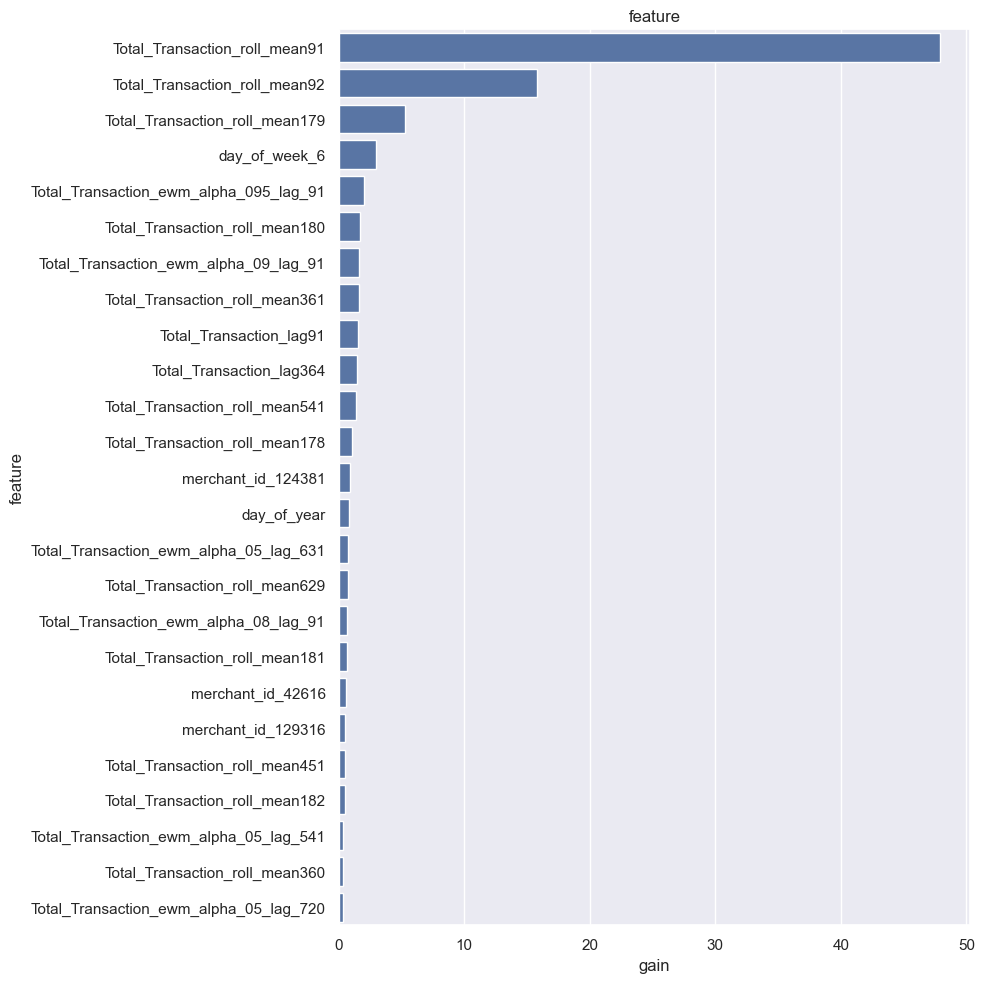

,feature,split,gain
62,Total_Transaction_roll_mean91,261,47.905251
63,Total_Transaction_roll_mean92,95,15.833189
65,Total_Transaction_roll_mean179,55,5.255484
197,day_of_week_6,149,3.001614
82,Total_Transaction_ewm_alpha_095_lag_91,20,1.996684
...,...,...,...
110,Total_Transaction_ewm_alpha_09_lag_360,0,0.000000
107,Total_Transaction_ewm_alpha_09_lag_181,0,0.000000
106,Total_Transaction_ewm_alpha_09_lag_180,0,0.000000
145,Total_Transaction_ewm_alpha_07_lag_179,0,0.000000


In [106]:
plot_lgb_importances(model,plot = True, num = 30)

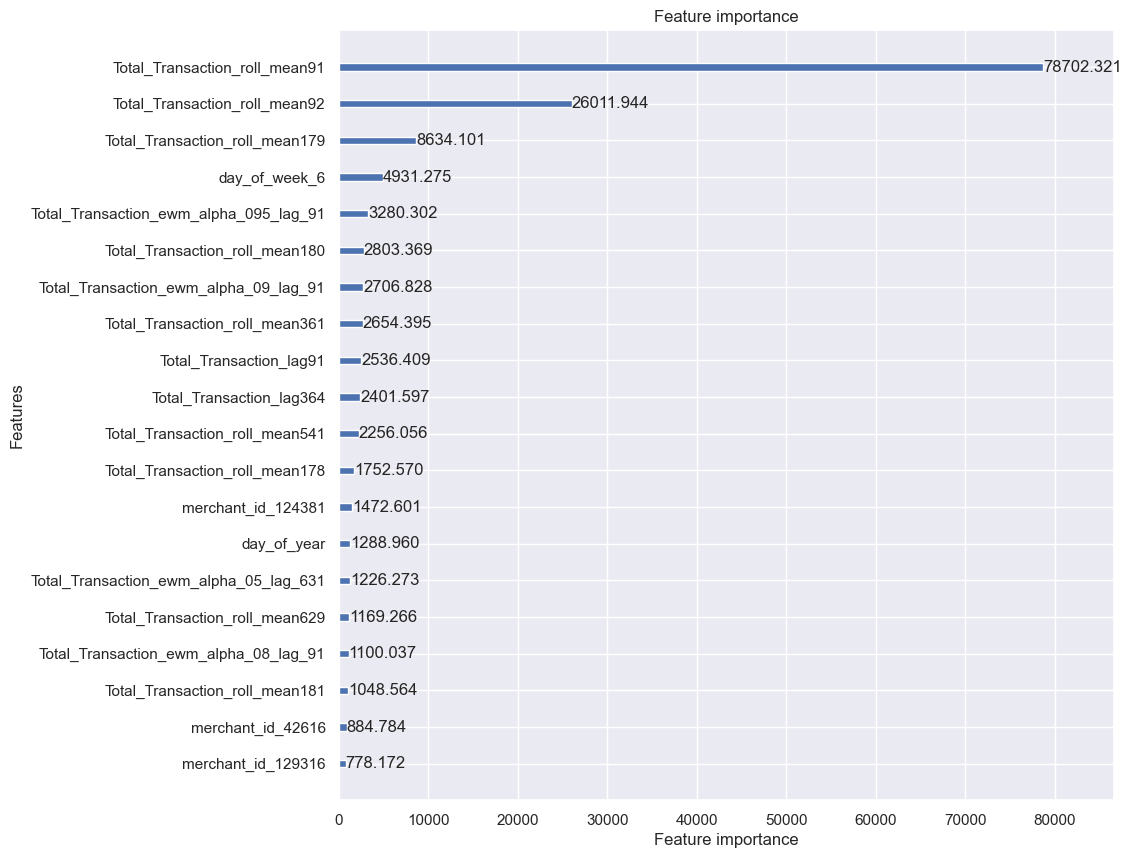

In [107]:
lgb.plot_importance(model, max_num_features = 20, figsize = (10,10), importance_type = 'gain')
plt.show()